### Import Packages

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score

import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

from wordcloud import WordCloud
stop = stopwords.words('english')

from collections import Counter
import re
import string
from nltk.corpus import stopwords

from PIL import Image
import os


### Read Data / Data Summary

In [5]:
train = pd.read_csv('train(2).csv')
test = pd.read_csv('test(2).csv')

In [6]:
#See the data
train.sample(5)

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,racism
7882,7883,14f9b80d8713c45f,"""\n\nI'm not talking about belief of majority....",0,0,0,0,0,0,0
61184,61185,a3c5bed275b2c1fe,""":::(1) In Pakistan, ethnic Pushtuns, who also...",0,0,0,0,0,0,0
49174,49175,837653baef0c4767,Further I have contributed positively to a num...,0,0,0,0,0,0,0
106056,106057,376aa2fe577a053d,""" \n\nI ment with """"article blocked"""" that the...",0,0,0,0,0,0,0
107823,107824,4052c1439ff1e9ec,"""Welcome\n\nHello, and welcome to Wikipedia! T...",0,0,0,0,0,0,0


### Additional hate speech category (Racism) was added in R using Regex into the dataset

In [7]:
(train['racism'] == 1).sum()

2265

In [25]:
((train['toxic'] | train['severe_toxic'] | train['obscene'] | train['threat'] | train['insult'] | train['identity_hate'] 
 | train['racism'])== 1).sum()

17517

In [9]:
#Percentage of Negative Comments

17517 / 159571

0.10977558578939782

In [28]:
#percentage of toxic
(train['toxic']==1).sum()

15294 / 159571

0.09584448302009764

In [30]:
#Percentage of Racism
(train['racism']==1).sum()

2265 / 159571

0.014194308489637842

### Data Visualization (Pie Chart)

([<matplotlib.patches.Wedge at 0x1a26b9fdd8>,
 [Text(-1.0989368893852833, 0.04834990329046847, 'Non Negative'),
  Text(1.1988402434287364, -0.05274533852131714, 'Racism')],
 [Text(-0.5994201214828818, 0.026372674522073706, '98.6%'),
  Text(0.6993234753334294, -0.030768114137434993, '1.4%')])

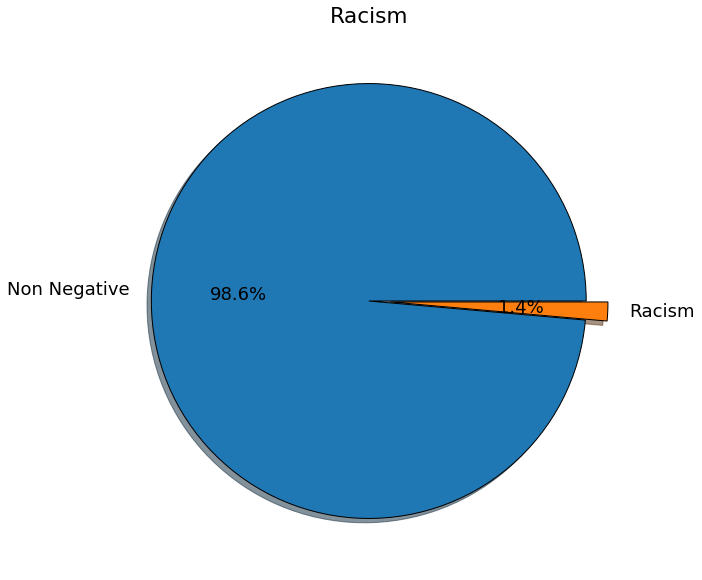

In [44]:
# piechart_in_matplotlib.py

import matplotlib.pyplot as plt

label = ["Non Negative", "Racism"]

total_comments = [159571, 2265]
explode = [0, 0.1]

plt.figure(figsize=(10,10))
plt.title("Racism")

import matplotlib as mpl
mpl.rcParams['font.size'] = 18.0

plt.pie(total_comments, labels=label, explode=explode,
        shadow=True,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})


([<matplotlib.patches.Wedge at 0x1a22fd6da0>,
 [Text(-1.0587366137758005, 0.29845733807455865, 'Non Negative'),
  Text(1.1549853816043667, -0.3255898774228328, 'Toxic')],
 [Text(-0.5774926984231639, 0.16279491167703197, '91.3%'),
  Text(0.6737414726025472, -0.18992742849665245, '8.7%')])

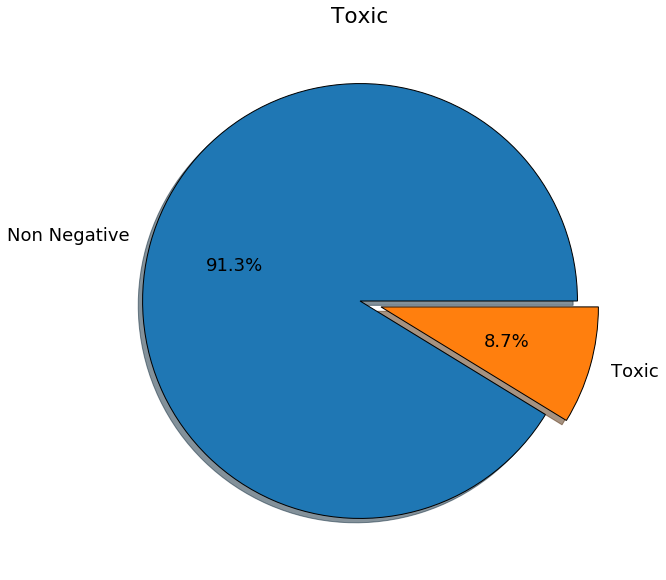

In [45]:
# piechart_in_matplotlib.py

label = ["Non Negative", "Toxic"]

total_comments = [159571, 15294]
explode = [0, 0.1]

plt.figure(figsize=(10,10))
plt.title("Toxic")

mpl.rcParams['font.size'] = 18.0

plt.pie(total_comments, labels=label, explode=explode,
        shadow=True,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})


In [10]:
#Check Summary Statistic
train.describe() #Only 9.58 % is toxic, 1% is severe_toxic, 5.3% is obscene, 0.3% is threat, 4.9% is insult, 0.89% is identity_hate, racism is 1.4%



,Unnamed: 0,toxic,severe_toxic,obscene,threat,insult,identity_hate,racism
count,159571.00000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,79786.00000,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.014194
std,46064.32424,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.118292
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39893.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79786.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119678.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,159571.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
plt.figure(figsize=(20,20))
wc = WordCloud(background_color="black", 
                stopwords=stopwords,width=2500, height=1800)

<Figure size 1440x1440 with 0 Axes>

In [12]:
identity_hate = train[train.identity_hate==1]

In [13]:
identity_hate.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,racism
42,43,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,1
105,106,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1,1
176,177,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1,0
218,219,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1,1
238,239,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1,0


### Table of different toxic comments category

In [14]:
TYPES = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'racism']

df_comb = train.groupby(TYPES)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
df_comb.head(n=40)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,racism,count
0,0,0,0,0,0,0,0,142054
1,1,0,0,0,0,0,0,5514
2,1,0,1,0,1,0,0,3619
3,1,0,1,0,0,0,0,1723
4,0,0,0,0,0,0,1,1292
5,1,0,0,0,1,0,0,1185
6,1,1,1,0,1,0,0,928
7,1,0,1,0,1,1,0,403
8,0,0,1,0,0,0,0,311
9,0,0,0,0,1,0,0,294


In [16]:
#pd.crosstab([train, train.toxic], [train, train.severe_toxic])

### Word Cloud of Different Types of Comments

In [17]:
word_counter = {}
stop = stopwords.words('english')

def clean_text(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stop)])

for type in TYPES:
    d = Counter()
    train[train[type] == 1]['comment_text'].apply(lambda t: d.update(clean_text(t).split()))
    word_counter[type] = pd.DataFrame.from_dict(d, orient='index')\
                                        .rename(columns={0: 'count'})\
                                        .sort_values('count', ascending=False)

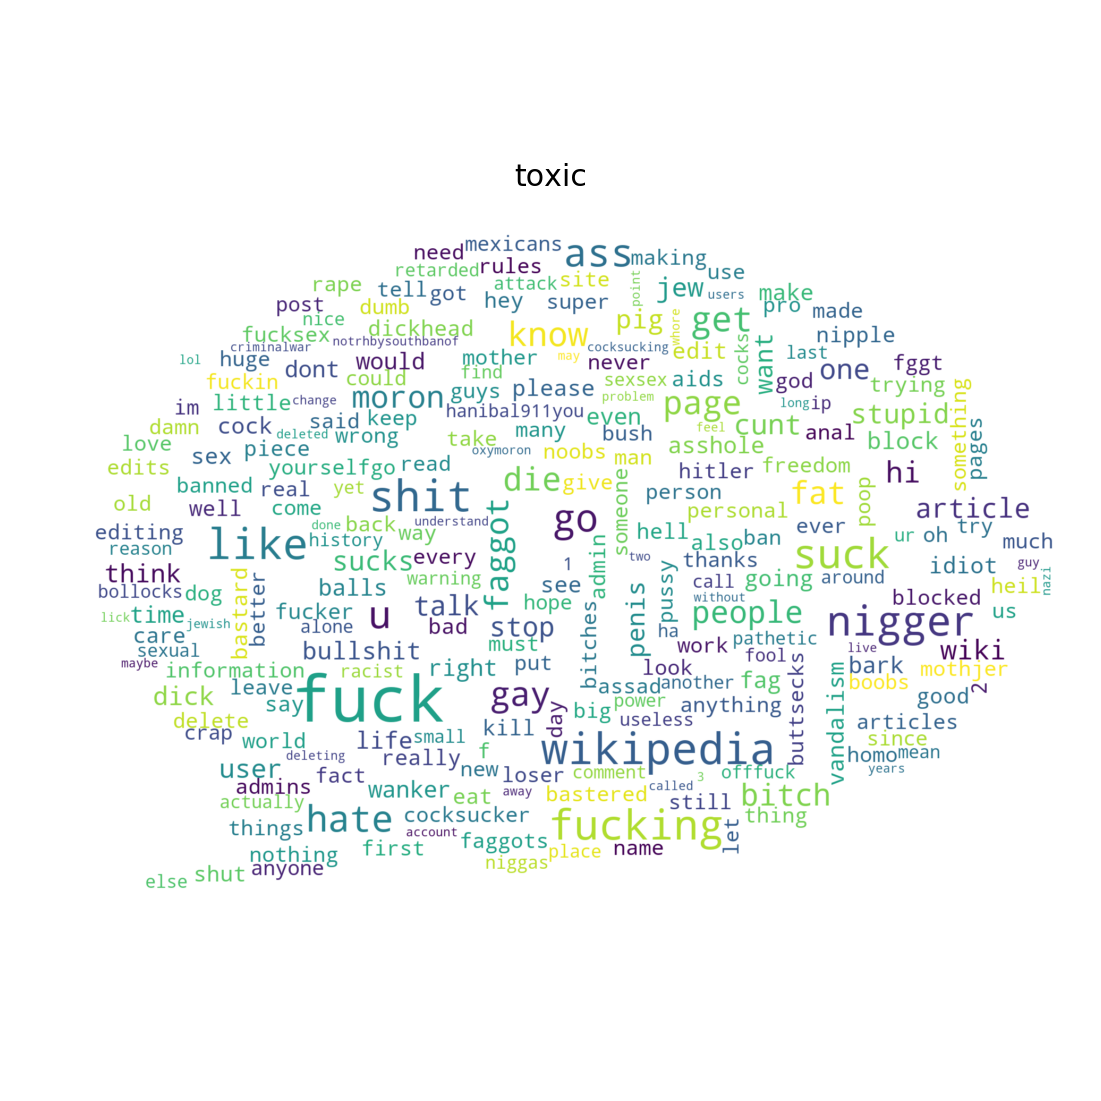

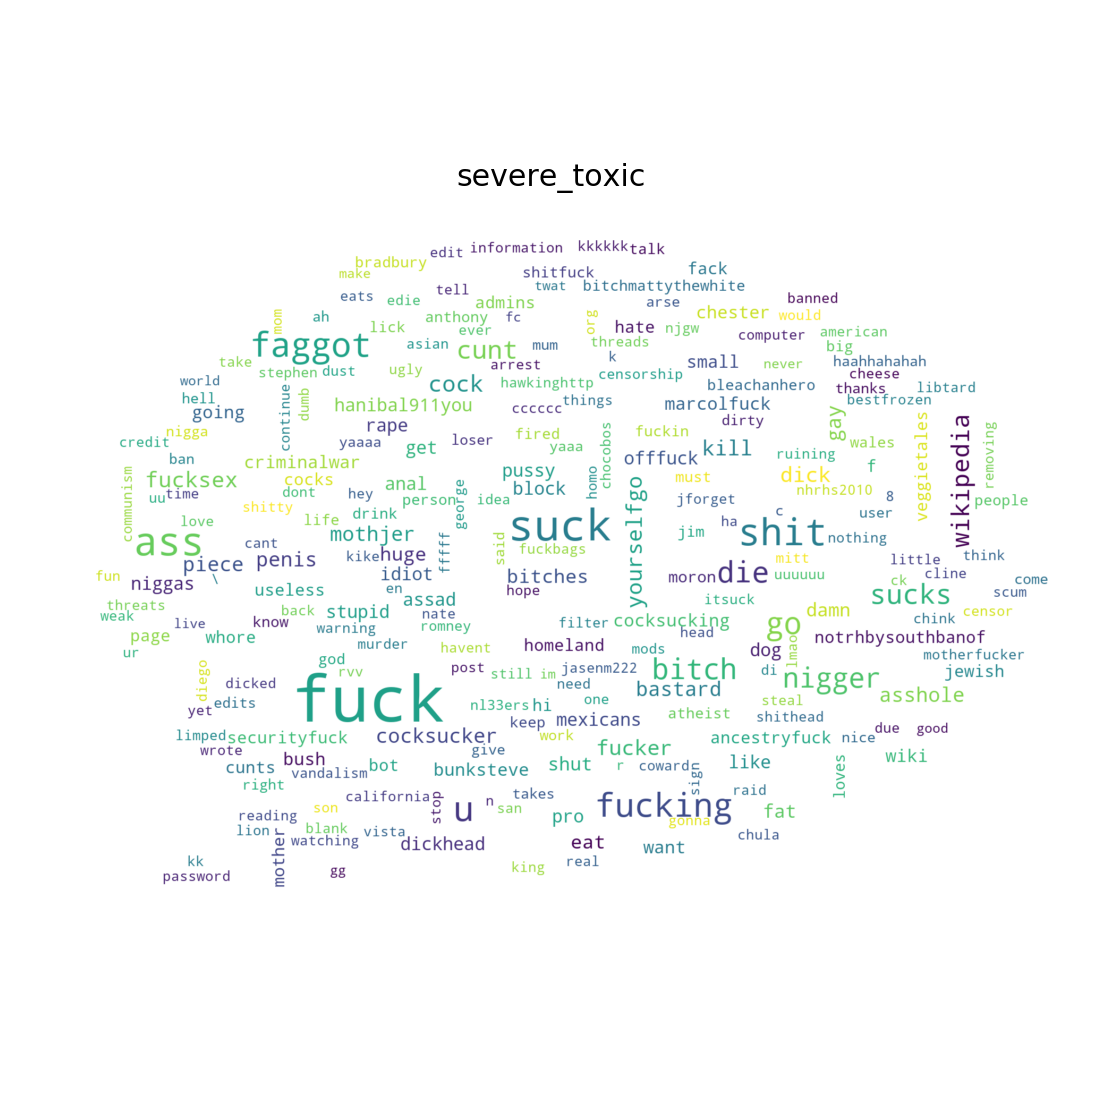

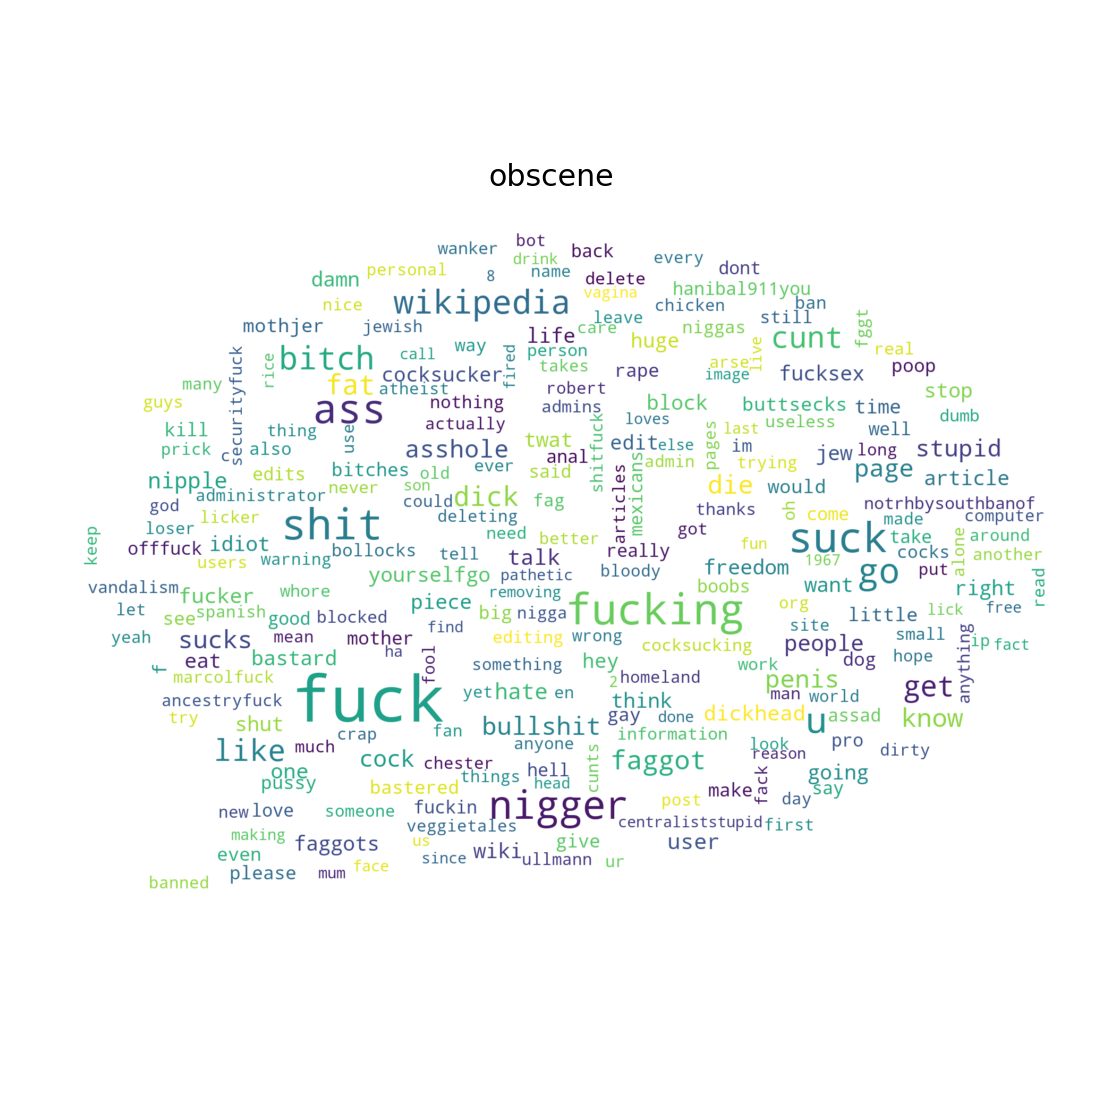

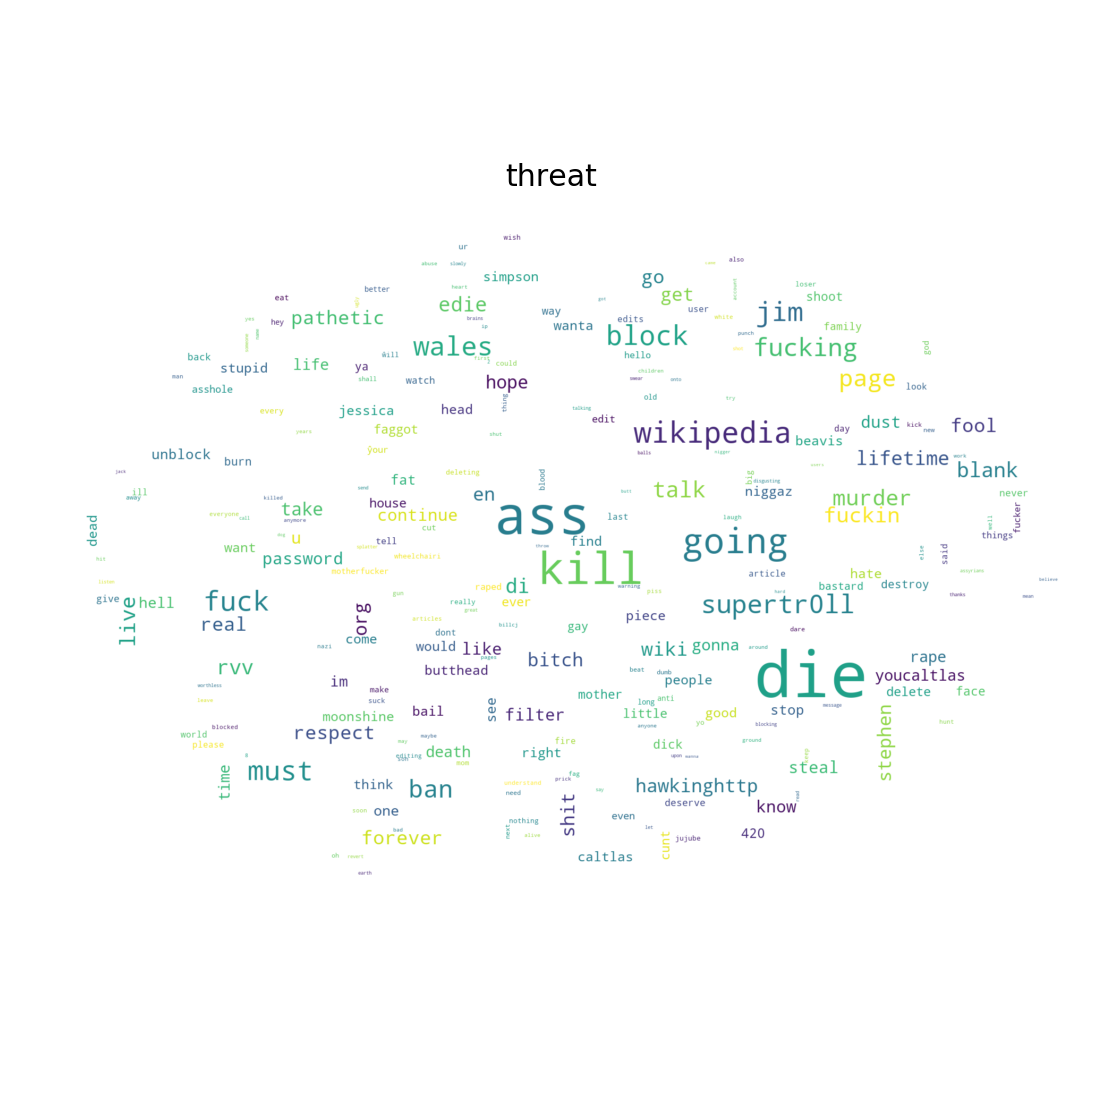

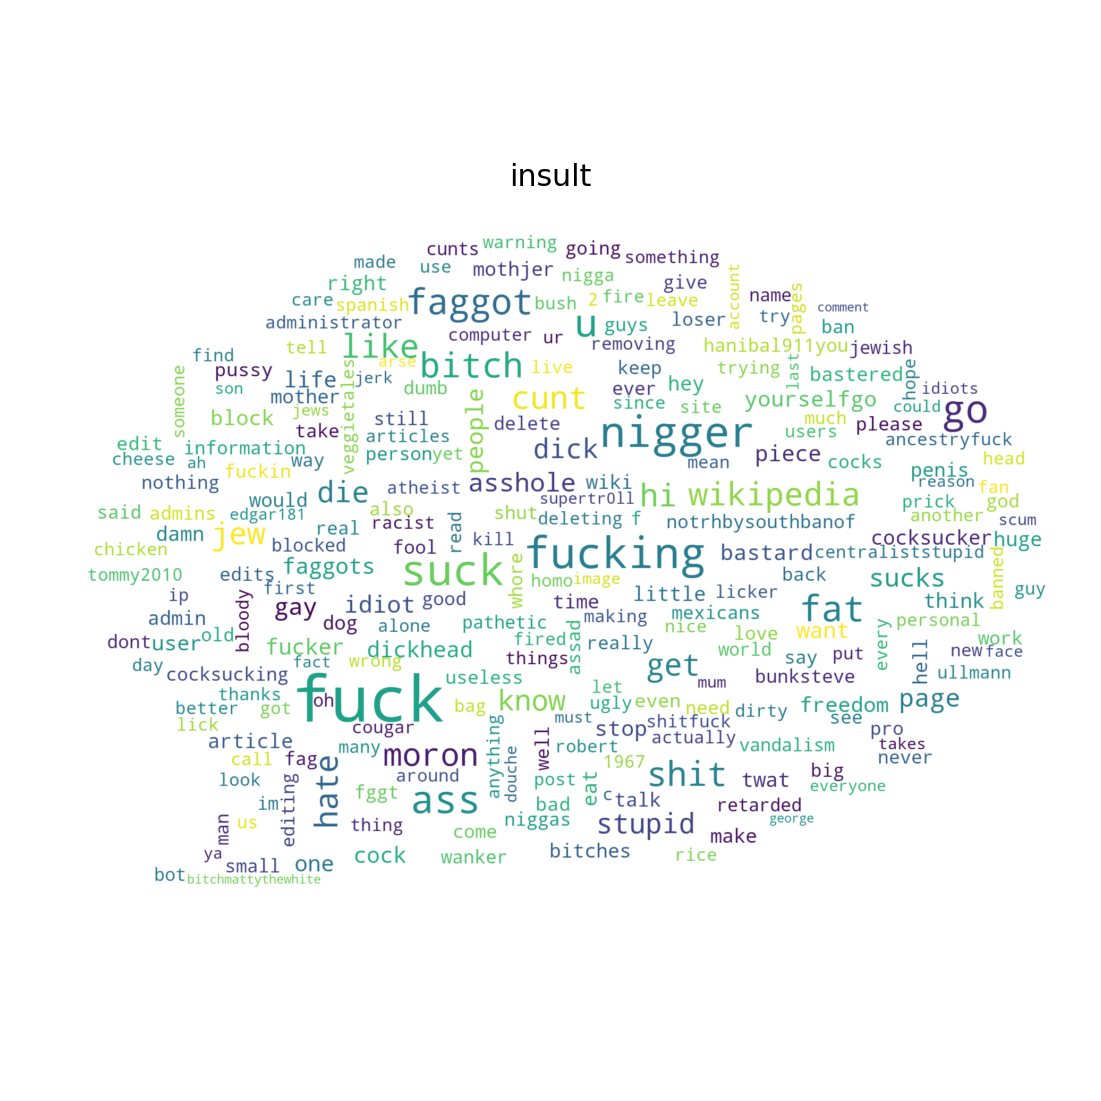

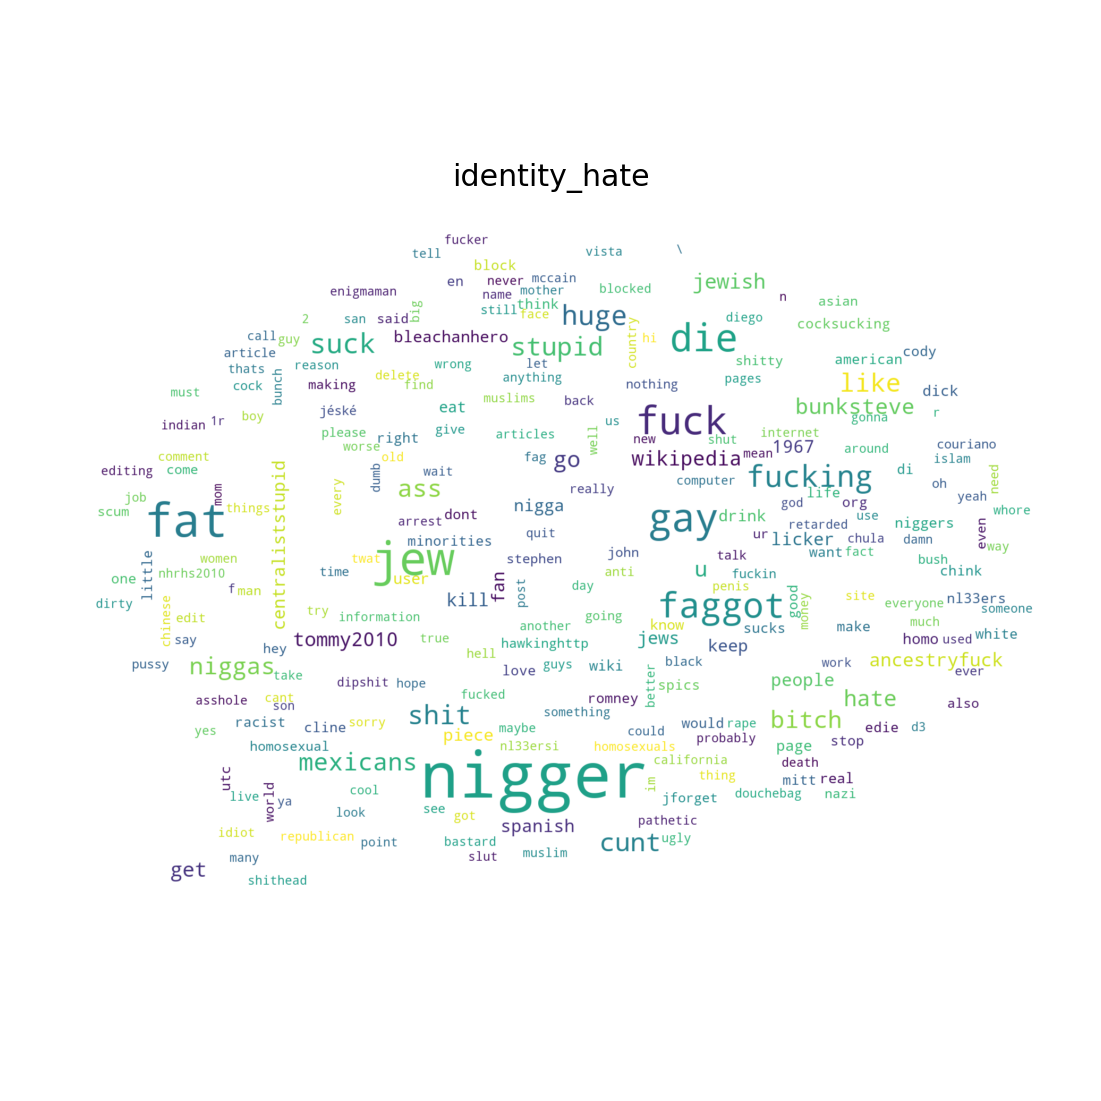

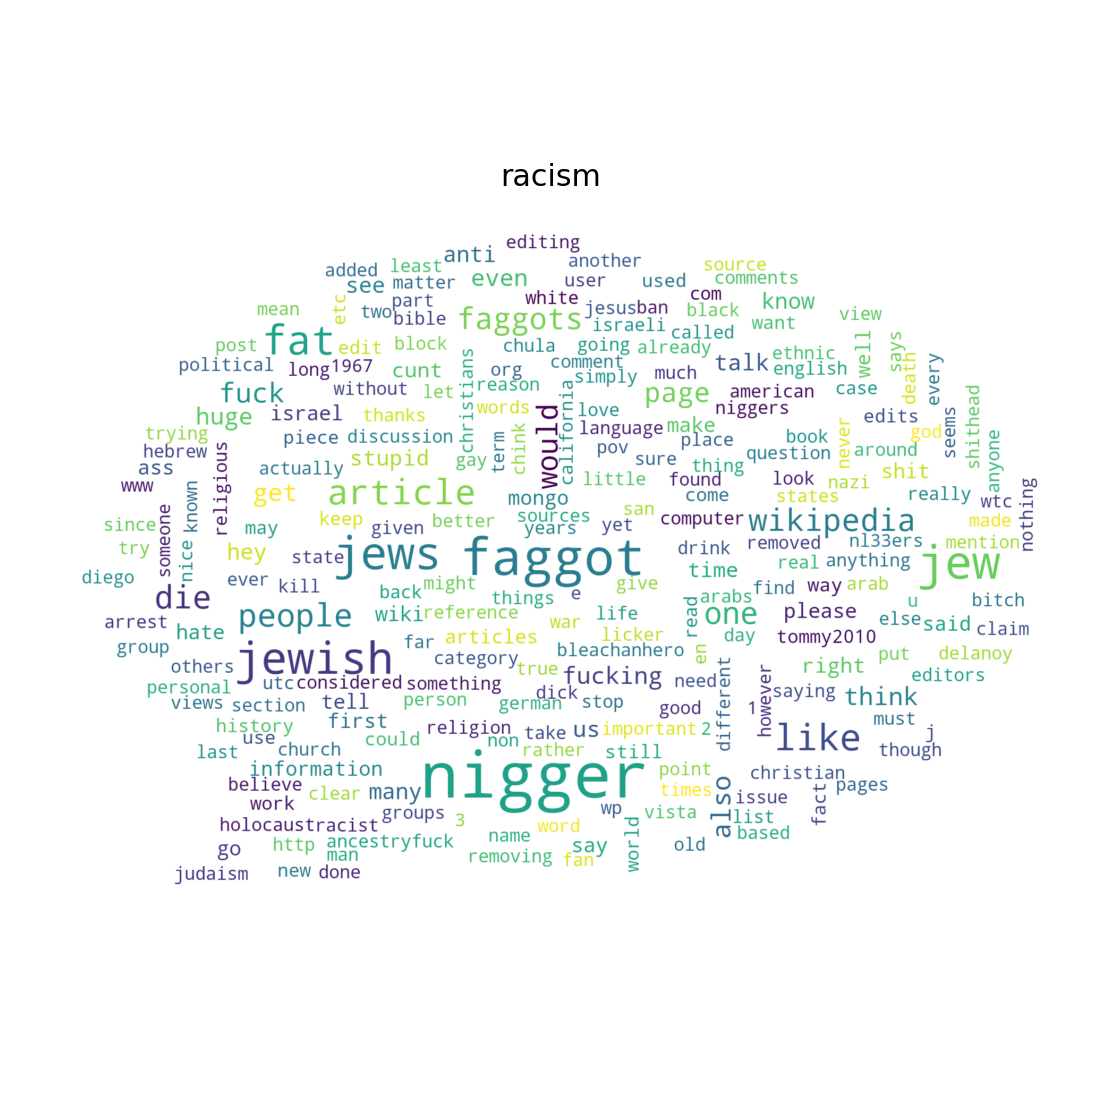

In [18]:
#Word Cloud Image Stored in Local Drive
mask = np.array(Image.open("mask.png"))


for w in word_counter:
    wc = word_counter[w]

    wordcloud = WordCloud(
          background_color='white',
          mask = mask,
          max_words=250,
          max_font_size=120, 
          random_state=4561
          #width=1000, height=600
         ).generate_from_frequencies(wc.to_dict()['count'])
    
    plt.figure(figsize=(30,20))
#     plt.suptitle(w, fontsize=50)
#     plt.subtitle_adjust(top = 0.3)
    plt.title(w, fontsize=30, y=0.83)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.show()

In [22]:
# # Adding 'none' columns if there is no '1' in COLUMNS
# train['none'] = (train[TYPES].max(axis=1) == 0).astype(int)
# train.append('none')
# CATEGORIES = COLUMNS.copy()

# print(train.shape)
# print(train.columns.values)

### Correlation Heat Map

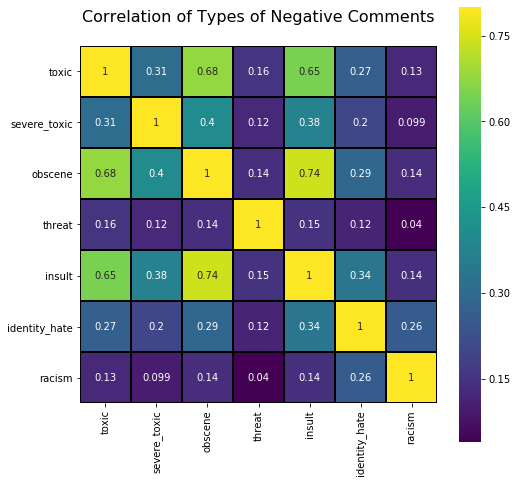

In [24]:
variables = train[TYPES]

plt.figure(figsize=(8,8))
plt.title('Correlation of Types of Negative Comments',y=1.05,size=16)
sns.heatmap(variables.astype(float).corr(),linewidths=0.5,vmax=0.8,square=True,cmap=plt.cm.viridis,
           linecolor='black',annot=True)


### Modeling Skeleton

In [68]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(train['comment_text'])
X_test = tfidf.transform(test['comment_text'])

for type in TYPES: #['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    y = train[type]
    model = LogisticRegression()
    model.fit(X_train, y)
    test[type] = model.predict_proba(X_test)[:, 1]
    
test.drop('comment_text', axis=1, inplace=True)
test.to_csv('simplest.csv', index=False)

/Users/clintonng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
test.describe()

,Unnamed: 0,racism
count,153164.000000,153164.000000
mean,76582.500000,0.019293
std,44214.782652,0.137553
min,1.000000,0.000000
25%,38291.750000,0.000000
50%,76582.500000,0.000000
75%,114873.250000,0.000000
max,153164.000000,1.000000


In [13]:
test.shape[0]

153164

In [ ]:
lr_model = LogisticRegression(C=1, solver='newton-cg')
lr_features = CountVectorizer() 
lr_classifier = make_pipeline(lr_features, lr_model)

#lr_features.fit(train.data)
#temp = lr.features.transform(train.data)
#model = lr_model.fit(temp, train.label)

lr_classifier.fit(train, test)

dt_model = DecisionTreeClassifier(min_samples_split=0.3)
dt_features = CountVectorizer()
dt_classifier = make_pipeline(dt_features, dt_model)
dt_classifier.fit(train, test)

#Compare accuracy of the two models
lr_train_preds = lr_classifier.predict(train)
lr_train_f1 = f1_score(train.target, lr_train_preds, average='micro')
lr_test_preds = lr_classifier.predict(test.data)
lr_test_f1 = f1_score(test.target, lr_test_preds, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f1, lr_test_f1)

dt_train_preds = dt_classifier.predict(train.data)
dt_train_f1 = f1_score(train.target, dt_train_preds, average='micro')
dt_test_preds = dt_classifier.predict(test.data)
dt_test_f1 = f1_score(test.target, dt_test_preds, average='micro')
print("Train/test F1 for Decision Tree: ", dt_train_f1, dt_test_f1)